<a href="https://colab.research.google.com/github/arjunsai918/Intro_to_ML/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from matplotlib import markers

In [84]:
def load_data(url):
    response = requests.get(url)
    data = pd.read_csv(StringIO(response.text))
    return data

In [85]:
# Load the data from the GitHub URL
github_url = "https://raw.githubusercontent.com/arjunsai918/Intro_to_ML/refs/heads/main/D3.csv"
data = load_data(github_url)
display(data)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [89]:
# Rename columns for consistency and clarity
data = data.rename(columns={'X1': 'x1', 'X2': 'x2', 'X3': 'x3', 'Y': 'y'})

# Extract the independent (explanatory) and dependent variables
independent_var1 = data['x1']
independent_var2 = data['x2']
independent_var3 = data['x3']
dependent_var = data['y']

# Calculate the number of observations (rows) in the dataset
num_observations = len(independent_var1)

# Display the number of observations
print(num_observations)

100


Gradient Descent function and Loss Function

In [90]:
def gradient_descent(X, Y, initial_theta, learning_rate, num_iterations):
    """
    Performs gradient descent to optimize the parameters (theta) for linear regression.

    Parameters:
    X (numpy array): Input feature matrix (with bias term if applicable).
    Y (numpy array): Target values.
    initial_theta (numpy array): Initial parameter vector.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Number of iterations for gradient descent.

    Returns:
    theta (numpy array): Optimized parameter vector.
    losses (list): History of loss values over iterations.
    """
    # Number of training examples
    num_samples = len(Y)

    # Initialize parameters and list to store loss values
    theta = initial_theta
    loss_history = []

    # Gradient descent iterations
    for iteration in range(num_iterations):
        # Predictions using current theta
        predictions = X.dot(theta)

        # Error (difference between predictions and actual values)
        error = predictions - Y

        # Gradient calculation
        gradient = (X.T.dot(error) / num_samples)

        # Update parameters (theta)
        theta -= learning_rate * gradient

        # Compute loss (mean squared error)
        loss = np.sum(error**2) / (2 * num_samples)

        # Store loss for this iteration
        loss_history.append(loss)

    return theta, loss_history

Problem 1 - Perform Linear Regression for Each Explanatory Variable Separately

In [91]:
# Set hyperparameters for gradient descent
learning_rate = 0.01  # Step size for parameter updates
num_iterations = 5000  # Number of iterations for gradient descent

# Initialize the parameter vector (theta) with zeros
initial_theta = np.zeros(2)  # Two parameters: one for the bias term and one for the feature

# Display the initial parameter vector
print("Initial theta:", initial_theta)

Initial theta: [0. 0.]


In [93]:
# Add a bias term (column of ones) to the feature X1 and stack it with X1
X1_with_bias = np.column_stack((np.ones(len(x1)), x1))

# Perform gradient descent to optimize the parameters (theta) for the linear regression model
theta1, cost_history1 = gradient_descent(X1_with_bias, y, initial_theta, learning_rate, num_iterations)

# Display the final optimized parameters (theta) for the model using X1
print("Final optimized parameters (theta) for X1 and Y:", theta1)

# Display the final cost value for the model using X1
print("Final cost for X1 and Y:", cost_history1[-1])

Final optimized parameters (theta) for X1 and Y: [ 5.92785998 -2.03830202]
Final cost for X1 and Y: 0.9849930835542466


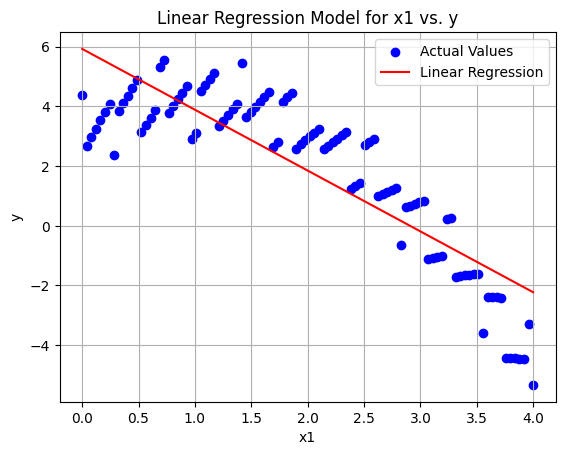

In [94]:
plt.scatter(x1, y, color='blue', label='Actual Values')
plt.plot(x1, np.dot(np.column_stack((np.ones(len(x1)), x1)), theta1), color='red', label='Linear Regression')
plt.grid(linestyle='-')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Linear Regression Model for x1 vs. y')
plt.legend()
plt.show()


In [95]:
# Perform gradient descent to find optimal theta values for x2 and y
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)

# Print the final optimized theta values for the model with x2 and y
print('Final optimized theta for x2 and y:', theta2)

# Print the cost history to track how the error decreases over iterations
print('Cost function history for x2 and y:', cost_history2)


Final optimized theta for x2 and y: [0.73614253 0.55757565]
Cost function history for x2 and y: [8.182403599005609, 8.06106499912682, 7.952288998482203, 7.854588904890693, 7.7666549119947215, 7.687333049267685, 7.615606637058188, 7.550579948561112, 7.491463816081973, 7.4375629502155425, 7.388264768094697, 7.3430295511238475, 7.301381773982686, 7.2629024655141965, 7.227222478698328, 7.194016561526374, 7.162998133465496, 7.13391468354518, 7.106543716090058, 7.080689178926858, 7.056178316649017, 7.032858898355365, 7.010596775298845, 6.989273729184631, 6.968785576529142, 6.949040498607592, 6.929957570144174, 6.911465463093597, 6.893501304677435, 6.876009671318252, 6.858941702299194, 6.84225431890111, 6.825909536465026, 6.809873858321421, 6.794117741843829, 6.778615128043658, 6.763343027144591, 6.7482811534747125, 6.733411603807417, 6.718718573980446, 6.704188109237838, 6.689807884281624, 6.675567009497678, 6.661455860240876, 6.647465926435459, 6.633589680072946, 6.619820458477773, 6.606152

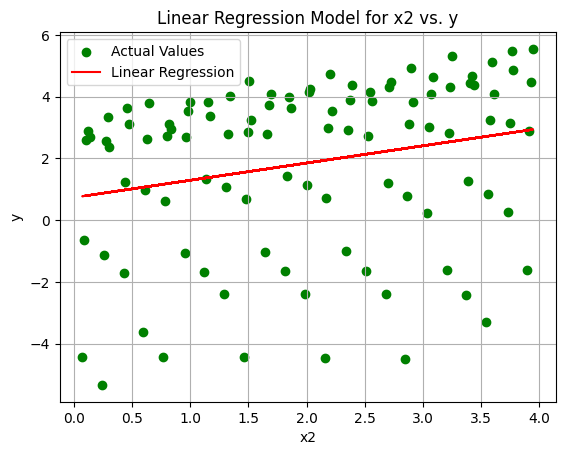

In [96]:
# Plot the actual data points for x2 and y
plt.scatter(x2, y, color='green', label='Actual Values')

# Plot the linear regression line based on the computed theta values
plt.plot(x2, np.dot(np.column_stack((np.ones(len(x2)), x2)), theta2), color='red', label='Linear Regression')

# Add grid lines for better visualization
plt.grid(linestyle='-')

# Label the axes
plt.xlabel('x2')
plt.ylabel('y')

# Set the title for the plot
plt.title('Linear Regression Model for x2 vs. y')

# Display the legend and show the plot
plt.legend()
plt.show()


In [97]:
# Apply gradient descent to compute the optimal theta values for x3 and y
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)

# Display the final optimized theta parameters for the regression model with x3 and y
print('Optimized theta parameters for x3 and y:', theta3)

# Output the cost function history to track the error reduction over iterations
print('Cost history during training for x3 and y:', cost_history3)


Optimized theta parameters for x3 and y: [ 2.87139341 -0.52047154]
Cost history during training for x3 and y: [4.407830865792402, 4.388730216571164, 4.37151876055964, 4.3559795945141335, 4.341920876123181, 4.329172927762379, 4.317585674966053, 4.307026380932802, 4.29737764285249, 4.288535619796161, 4.280408465407324, 4.272914941725866, 4.265983193211204, 4.2595496624505955, 4.253558131178121, 4.247958872122314, 4.24270789887401, 4.237766302446318, 4.2330996645077645, 4.228677538427526, 4.224472990295785, 4.220462192987914, 4.216624067142235, 4.212939963629622, 4.209393382719736, 4.205969725702901, 4.202656075216733, 4.199441000960167, 4.19631438786084, 4.1932672841009335, 4.19029176670645, 4.187380822670117, 4.184528243812727, 4.181728533795153, 4.178976825876804, 4.17626881017858, 4.1736006693518535, 4.170969021682057, 4.168370870767622, 4.165803561014369, 4.163264738273279, 4.160752315027224, 4.158264439600913, 4.155799468929126, 4.153355944471995, 4.1509325709136276, 4.1485281973224

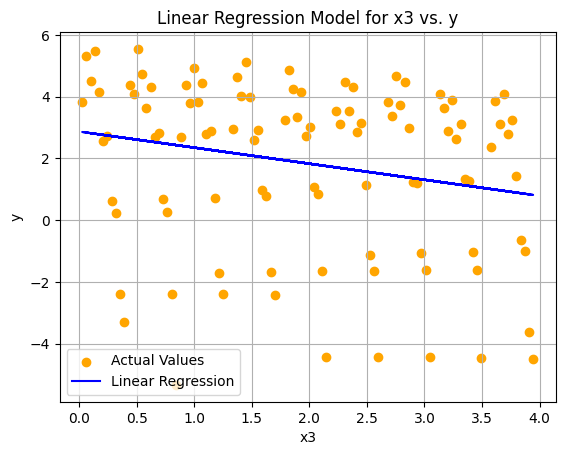

In [98]:
# Plot the actual data points for x3 and y
plt.scatter(x3, y, color='orange', label='Actual Values')

# Plot the linear regression line using the optimized theta values
plt.plot(x3, np.dot(np.column_stack((np.ones(len(x3)), x3)), theta3), color='blue', label='Linear Regression')

# Add grid lines for better visualization
plt.grid(linestyle='-')

# Label the axes
plt.xlabel('x3')
plt.ylabel('y')

# Set the title for the regression model visualization
plt.title('Linear Regression Model for x3 vs. y')

# Display the legend and render the plot
plt.legend()
plt.show()


Taking different learning rates for X1, X2 and X3 and plotting Loss Function

First Learning rate was 0.01

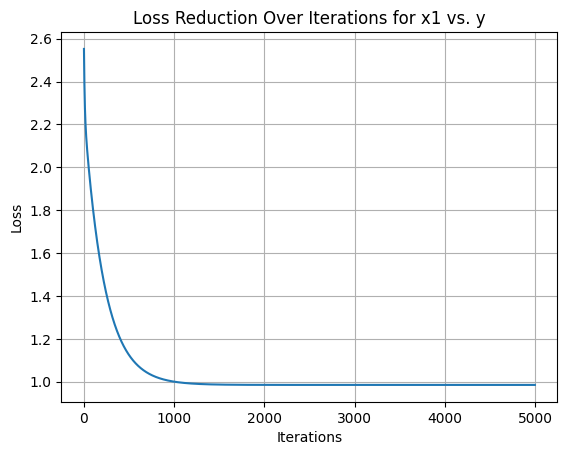

In [99]:
# Perform gradient descent to compute the optimal theta values for x1 and y
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)

# Plot the loss function history over iterations
plt.plot(cost_history1)

# Add grid lines for better visualization
plt.grid(linestyle='-')

# Label the axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the title to illustrate loss reduction over training
plt.title('Loss Reduction Over Iterations for x1 vs. y')

# Display the plot
plt.show()


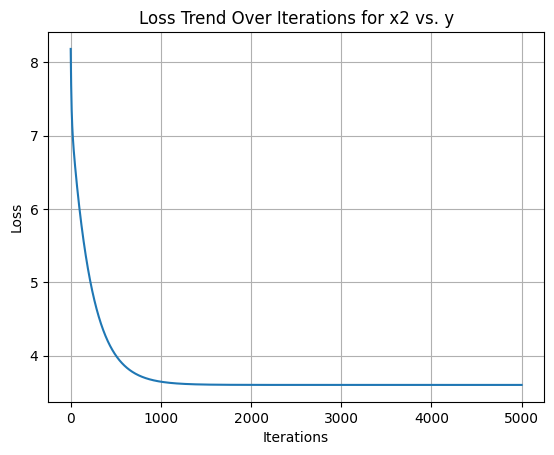

In [100]:
# Execute gradient descent to determine the optimal theta values for x2 and y
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)

# Plot the cost function history to visualize loss reduction over iterations
plt.plot(cost_history2)

# Add grid lines for improved readability
plt.grid(linestyle='-')

# Label the axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the title to show the progression of loss over training
plt.title('Loss Trend Over Iterations for x2 vs. y')

# Render the plot
plt.show()


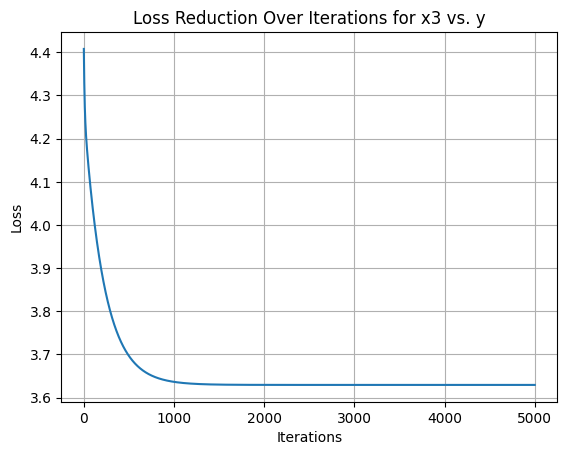

In [101]:
# Perform gradient descent to find the optimal theta values for x3 and y
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)

# Plot the cost function history to visualize the reduction in loss over iterations
plt.plot(cost_history3)

# Add grid lines for better clarity
plt.grid(linestyle='-')

# Label the axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the title to illustrate the loss trend during training
plt.title('Loss Reduction Over Iterations for x3 vs. y')

# Display the plot
plt.show()


ext taking learning rate as 0.06

In [102]:
# Set the learning rate and number of iterations for gradient descent
learning_rate = 0.06
num_iterations = 2000

# Initialize theta with zeros
initial_theta = np.zeros(2)

# Print the initial theta values
print(initial_theta)


[0. 0.]


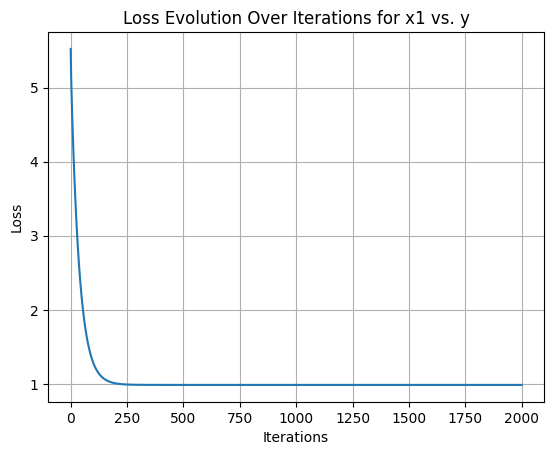

In [103]:
# Perform gradient descent to compute the optimal theta values for x1 and y
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)

# Plot the cost function history to observe the loss reduction over iterations
plt.plot(cost_history1)

# Add grid lines for better clarity
plt.grid(linestyle='-')

# Label the axes for the plot
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the plot title to illustrate the loss trend over iterations
plt.title('Loss Evolution Over Iterations for x1 vs. y')

# Display the plot
plt.show()


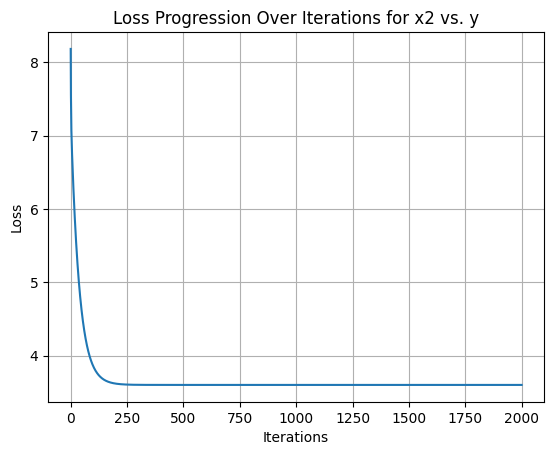

In [104]:
# Run gradient descent to determine the optimal theta values for x2 and y
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)

# Plot the loss history to show the reduction of the cost over iterations
plt.plot(cost_history2)

# Add grid lines for better visualization
plt.grid(linestyle='-')

# Label the x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the title to indicate the loss change during the iterations
plt.title('Loss Progression Over Iterations for x2 vs. y')

# Display the plot
plt.show()


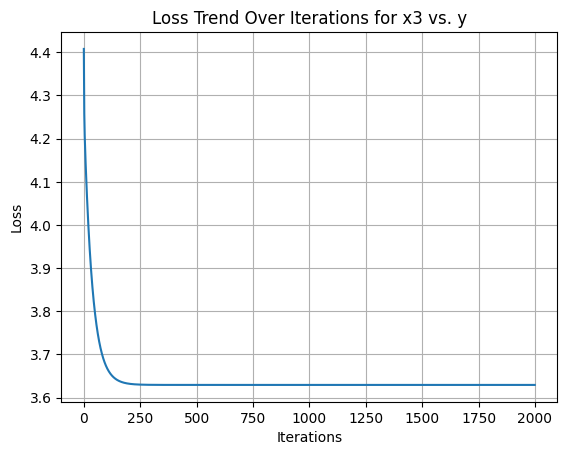

In [105]:
# Perform gradient descent to compute the optimal theta values for x3 and y
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)

# Plot the cost function history to observe the loss reduction over iterations
plt.plot(cost_history3)

# Add grid lines for better clarity
plt.grid(linestyle='-')

# Label the axes for the plot
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the plot title to reflect the loss change during training
plt.title('Loss Trend Over Iterations for x3 vs. y')

# Display the plot
plt.show()


Next taking learning rate as 0.2

In [109]:
learning_rate = 0.2
num_iterations = 1000
initial_theta = np.zeros(2)
print(initial_theta)


[0. 0.]


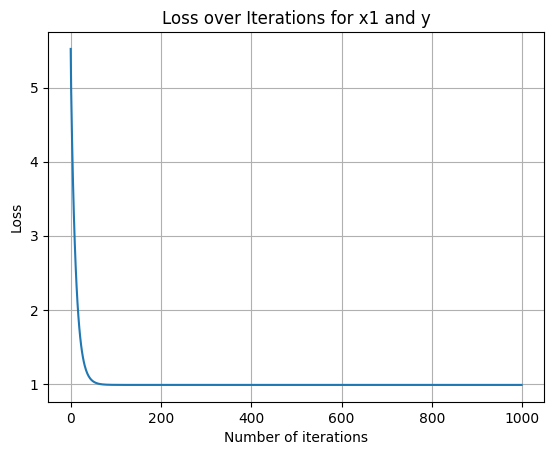

In [110]:
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history1)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x1 and y')
plt.show()

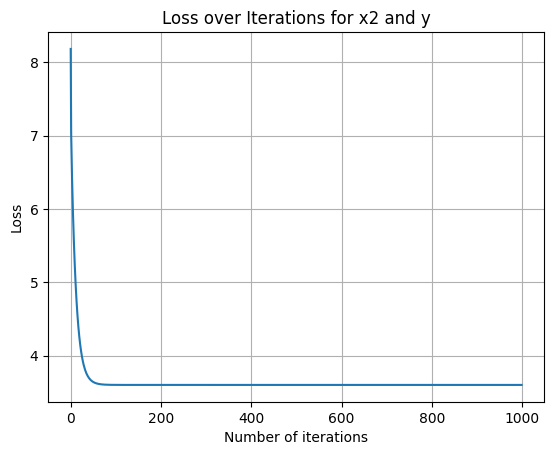

In [111]:
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history2)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x2 and y')
plt.show()

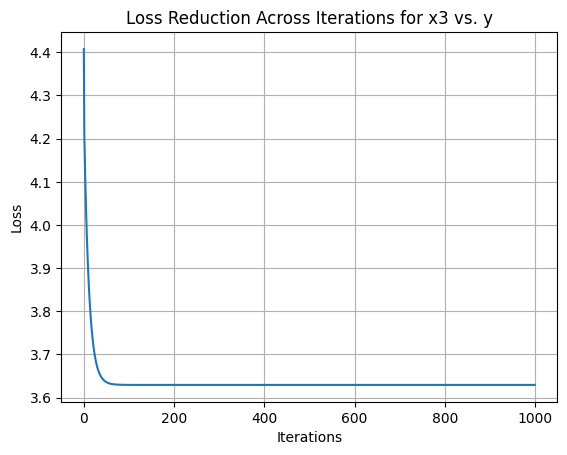

In [112]:
# Perform gradient descent to find the optimal theta values for x3 and y
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)

# Plot the loss history to observe the reduction in cost over iterations
plt.plot(cost_history3)

# Add grid lines for improved clarity
plt.grid(linestyle='-')

# Label the x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the title to highlight the loss progression during training
plt.title('Loss Reduction Across Iterations for x3 vs. y')

# Display the plot
plt.show()


Next taking learning rate very high 0.7

In [113]:
learning_rate = 0.7
num_iterations = 100
initial_theta = np.zeros(2)
print(initial_theta)

[0. 0.]


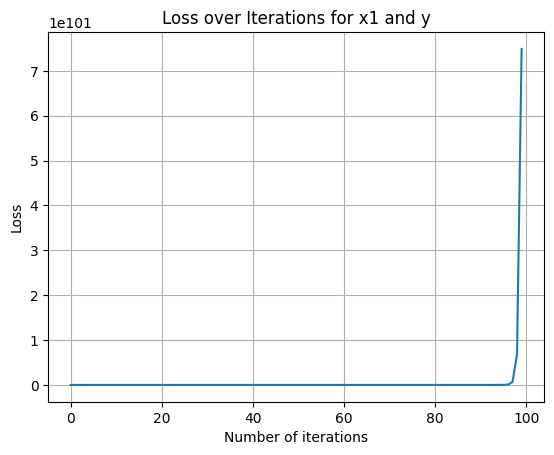

In [114]:
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history1)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x1 and y')
plt.show()

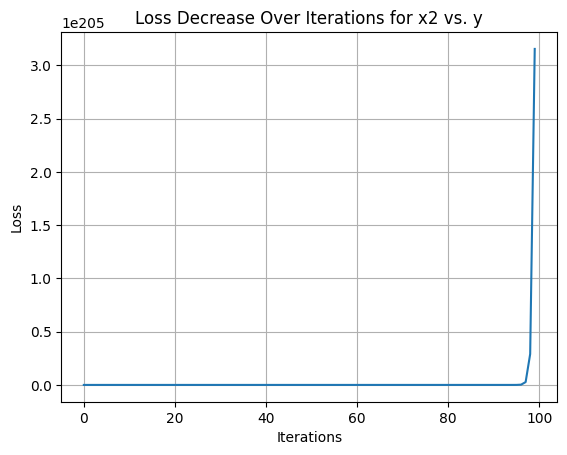

In [115]:
# Apply gradient descent to compute the optimal theta values for x2 and y
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)

# Plot the cost function history to track the reduction in loss over iterations
plt.plot(cost_history2)

# Add grid lines for better visualization
plt.grid(linestyle='-')

# Label the axes for the plot
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the plot title to indicate the loss progression over training
plt.title('Loss Decrease Over Iterations for x2 vs. y')

# Show the plot
plt.show()


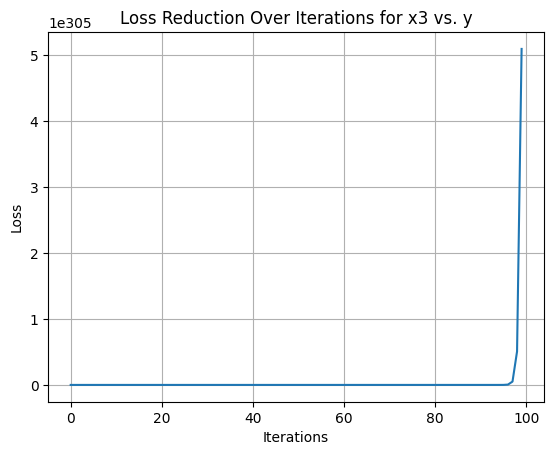

In [116]:
# Run gradient descent to determine the optimal theta values for x3 and y
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)

# Plot the cost function history to observe how the loss decreases over iterations
plt.plot(cost_history3)

# Add grid lines for better clarity
plt.grid(linestyle='-')

# Label the x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the title to illustrate the reduction of loss during training
plt.title('Loss Reduction Over Iterations for x3 vs. y')

# Show the plot
plt.show()


Problem 2 - Linear Regression with All Explanatory Variables

Optimized theta for x1, x2, x3, and y: [ 5.31351679 -2.00362739  0.53267081 -0.26550653]


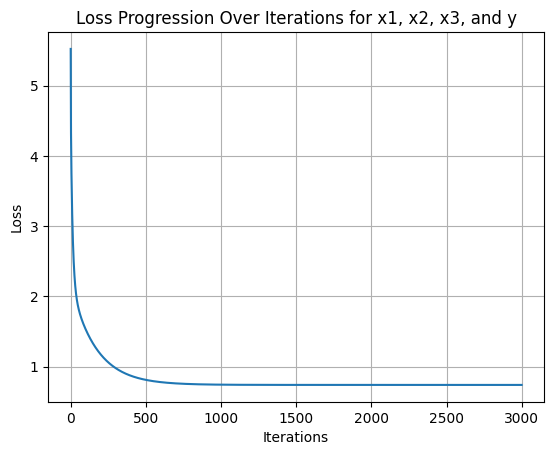

Predicted values for new inputs: [3.57705367 0.24423588 0.1024697 ]


In [117]:
# Set the learning rate, number of iterations, and initialize theta for a model with 4 features
learning_rate = 0.03
num_iterations = 3000
initial_theta = np.zeros(4)

# Prepare the feature matrix X by stacking a column of ones with x1, x2, and x3
X = np.column_stack((np.ones(len(x1)), x1, x2, x3))

# Perform gradient descent to find the optimal theta values
theta4, cost_history4 = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)
print('Optimized theta for x1, x2, x3, and y:', theta4)

# Plot the loss history over the iterations
plt.plot(cost_history4)
plt.grid(linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression Over Iterations for x1, x2, x3, and y')
plt.show()

# Predict values for new input data
test_data = np.array([[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]])
predictions = test_data.dot(theta4)
print("Predicted values for new inputs:", predictions)


In [118]:
learning_rate = 0.05
num_iterations = 1000
initial_theta = np.zeros(4)

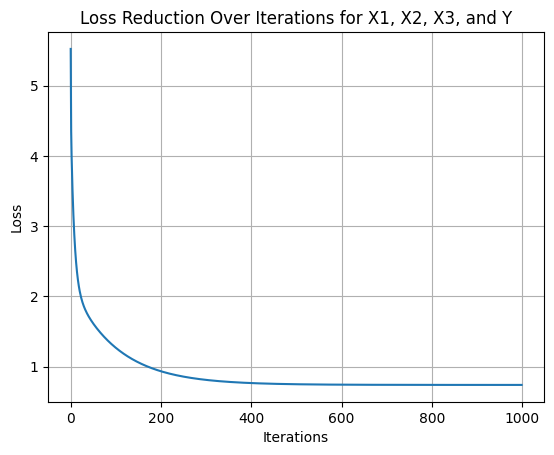

In [119]:
# Run gradient descent to calculate the optimal theta values for X1, X2, X3, and Y
theta4, cost_history4 = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)

# Plot the loss history to visualize how the cost decreases over iterations
plt.plot(cost_history4)

# Add grid lines for better clarity
plt.grid(linestyle='-')

# Label the x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the plot title to show the loss progression during training
plt.title('Loss Reduction Over Iterations for X1, X2, X3, and Y')

# Show the plot
plt.show()


In [120]:
learning_rate = 0.3
num_iterations = 500
initial_theta = np.zeros(4)

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


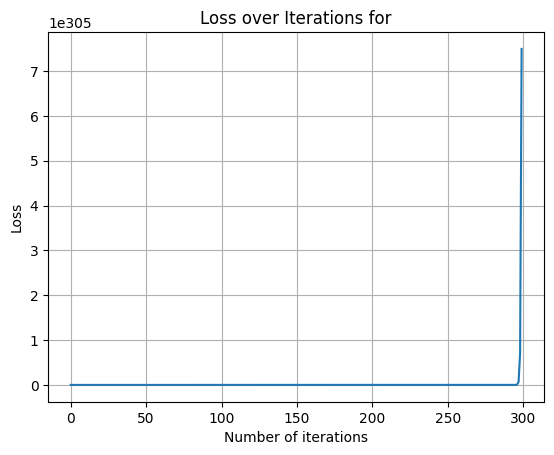

In [121]:
theta4, cost_history4 = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history4)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for')
plt.show()

In [122]:
# Set the learning rate and number of iterations for the gradient descent algorithm
learning_rate = 0.7
num_iterations = 100

# Initialize the theta values to zero for a model with 4 features
initial_theta = np.zeros(4)


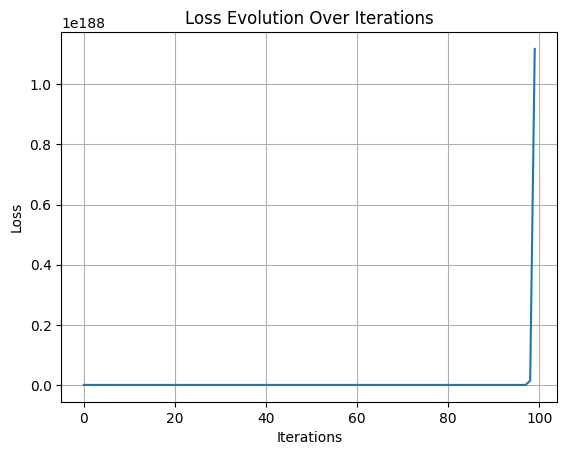

In [123]:
# Perform gradient descent to compute the optimal theta values for the model
theta4, cost_history4 = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)

# Plot the history of the cost function to track how the loss decreases over iterations
plt.plot(cost_history4)

# Add grid lines for better clarity
plt.grid(linestyle='-')

# Label the x and y axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Set the plot title to indicate loss progression
plt.title('Loss Evolution Over Iterations')

# Display the plot
plt.show()
